<a name = "inicio"></a>
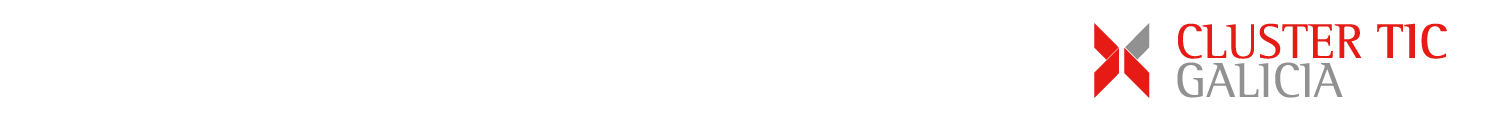

<div style="font-size: 50px;text-align: center;height:70px;line-height: 60px;padding:10px;margin:10px 0 0 0;">Limpieza y preparación de datos</div>

1. [Aplicación de funciones y mapeado](#Aplicación-de-funciones-y-mapeado)
1. [Agrupaciones](#Agrupaciones)
1. [Reindexación](#Reindexación)
1. [Ordenación y clasificación](#Ordenación-y-clasificación)

In [1]:
import numpy as np
import pandas as pd

# Aplicación de funciones y mapeado

Pandas ofrece varios métodos para aplicar funciones a los valores de una serie o de un dataframe, o para sustituir dichos valores por otros aplicando un cierto "mapeado". Más concretamente nos encontramos con los siguientes métodos:

* [pandas.Series.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html): Aplica una función a cada uno de los elementos de la serie cuyo resultado, por lo tanto, tendrá el mismo tamaño que la serie original.
* [pandas.Series.map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html): Devuelve una serie del mismo tamaño que la original en la que cada valor ha sido sustituido por otro valor resultante de aplicar una "función de mapeado".
* [pandas.Series.agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.agg.html): Devuelve el resultado de aplicar una o más funciones de agregación a los valores de la serie.
* [pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html): Aplica una función a las filas o a las columnas de un dataframe. Si, por ejemplo, se aplica a las filas, el resultado será una serie con tantos valores como filas tuviese el dataframe original.
* [pandas.DataFrame.map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.map.html): Aplica una función a cada uno de los elementos del dataframe que, por lo tanto, tendrá el mismo tamaño que el dataframe original.
* [pandas.DataFrame.agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html): Aplica una o más funciones a un dataframe a lo largo del eje que se especifique.

Los nombres pueden parecer un tanto confusos: el método **.apply()**, por ejemplo, se aplica a nivel de elemento en las series pero a nivel de fila o columna en los dataframes, mientras que el método **.map()** se aplica a nivel de elemento en ambas estructuras.

Revisemos estos métodos con más detalle.

### Series.apply()

El método [pandas.Series.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) permite aplicar a cada uno de los elementos de la serie una función. Ésta deberá aceptar un único valor como argumento y devolver también un único valor. Por ejemplo, si tenemos la siguiente serie:

In [2]:
s = pd.Series([2, 5, 4])
s

0    2
1    5
2    4
dtype: int64

y definimos una función que eleve al cubo el argumento de entrada:

In [3]:
def cubo(n):
    return n ** 3

podemos usar el método **.apply()** para aplicar esta función a cada uno de los elementos de la serie $s$:

In [4]:
s.apply(cubo)

0      8
1    125
2     64
dtype: int64

El resultado es también una serie pandas.

### Series.map()

El método [pandas.Series.map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) aplicado a una serie $s$ acepta un argumento que indica el tipo de mapeo a realizar y devuelve una serie equivalente a $s$ con sus valores una vez mapeados. Por ejemplo, supongamos que tenemos una serie cuyos valores representan el mes en el que se ha realizado una venta. Por ejemplo:

In [5]:
sales = pd.Series([1, 2, 1, 1, 3, 1])
sales

0    1
1    2
2    1
3    1
4    3
5    1
dtype: int64

Y supongamos que queremos generar una serie equivalente a ésta en la que cada mes aparezca representado por su nombre, y no por un número. Veamos por separado las opciones de las que disponemos:

##### Uso de un diccionario como función de mapeo

Una de las formas que tenemos de definir este "mapeo" entre números y cadenas de texto es utilizando un diccionario:

In [6]:
months = {1:"jan", 2:"feb", 3:"mar"}
months

{1: 'jan', 2: 'feb', 3: 'mar'}

Ahora, si ejecutamos el método *.map()* pasando como argumento este diccionario, se devolverá la serie que buscábamos:

In [7]:
sales.map(months)

0    jan
1    feb
2    jan
3    jan
4    mar
5    jan
dtype: object

##### Uso de una serie como función de mapeo

El método también admite como "función de mapeo" una serie Pandas:

In [8]:
months = pd.Series(["jan", "feb", "mar"], index = [1, 2, 3])
months

1    jan
2    feb
3    mar
dtype: object

In [9]:
sales.map(months)

0    jan
1    feb
2    jan
3    jan
4    mar
5    jan
dtype: object

En este caso, cada valor de la serie original (*sales*, en nuestro ejemplo) se mapeará con el elemento cuya etiqueta coincida con él.

##### Uso de una función como función de mapeo

El tercer método al que podemos recurrir es utilizar una función que acepte como entradas los valores que se encuentren en la serie original y devuelva el resultado del mapeo. Por ejemplo:

In [10]:
def month_to_str(n):
    if n == 1:
        return "jan"
    elif n == 2:
        return "feb"
    elif n == 3:
        return "mar"

In [11]:
sales.map(month_to_str)

0    jan
1    feb
2    jan
3    jan
4    mar
5    jan
dtype: object

### Series.agg()

El método **.agg()** aplicado a una serie pandas permite aplicar una o más funciones a sus valores. Por ejemplo, si partimos de la siguiente serie:

In [12]:
s = pd.Series([4, 7, 8, 15])

podemos aplicar a sus valores una función de agregación:

In [13]:
s.agg("max")

15

o varias funciones de agregación:

In [14]:
s.agg(["max", "min", "mean", "median", "var", "std"])

max       15.000000
min        4.000000
mean       8.500000
median     7.500000
var       21.666667
std        4.654747
dtype: float64

Las funciones que se indiquen pueden pasarse como texto (tal y como se ha hecho en el ejemplo anterior), puede referenciarse a una función NumPy o a una función estándar:

In [15]:
def values_range(s):
    return s.max() - s.min()

In [16]:
s.agg(values_range)

11

### DataFrame.apply()

Los dataframes tienen un método con el mismo nombre que el método *apply* de las series, [pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html), pero con funcionalidad diferente pues, en el caso de los dataframes, se aplica a lo largo de un eje del mismo. Esto quiere decir que el argumento de entrada de la función a utilizar no va a ser un simple escalar, sino una serie cuyo índice va a ser el índice de filas del dataframe (si la función se aplica al eje 0) o el índice de columnas del dataframe (si la función se aplica al eje 1). El resultado del método también será una serie que estará formada por los valores obtenidos para cada fila o columna.

Por ejemplo, si tenemos el siguiente dataframe con las ventas de los productos A, B, C y D a lo largo de los meses de enero, febrero y marzo:

In [17]:
sales = pd.DataFrame({
    "A":[3, 3, 1],
    "B":[1, 5, 2],
    "C":[3, 7, 2],
    "D":[7, 2, 3]
    },
    index = ["jan", "feb", "mar"])
sales

,A,B,C,D
jan,3,1,3,7
feb,3,5,7,2
mar,1,2,2,3


podríamos estar interesados en calcular el rango en el que se mueven las ventas, es decir, la diferencia entre el mayor y el menor valor de ventas. Para ello, sabiendo que dicho rango se va a aplicar a una fila o a una columna -es decir, a una serie-, utilizaríamos la misma función que hemos definido en la sección anterior:

In [18]:
def values_range(s):
    return s.max() - s.min()

Esta función acepta un iterable y devuelve la diferencia entre el valor máximo y el mínimo.

Ahora podemos aplicar esta función a nuestro dataframe de ventas. Por defecto se va a aplicar al eje 0 (eje vertical):

In [19]:
sales.apply(values_range)

A    2
B    4
C    5
D    5
dtype: int64

Si nos fijamos en la columna A, el valor máximo es 3 y el mínimo es 1, de forma que su diferencia es 2, tal y como se muestra en el resultado del método *.apply()*.

Si aplicamos el método a lo largo del eje 1 (eje horizontal), obtendremos la diferencia entre el mayor y el menor valor de cada fila:

In [20]:
sales.apply(values_range, axis = 1)

jan    6
feb    5
mar    2
dtype: int64

### DataFrame.map()

El método [pandas.DataFrame.map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.map.html) aplica una función de mapeo a cada uno de los elementos del dataframe.

Para ver un ejemplo partimos del siguiente dataframe:

In [21]:
sales

,A,B,C,D
jan,3,1,3,7
feb,3,5,7,2
mar,1,2,2,3


Supongamos que queremos saber si los valores son pares o no. Para ello definimos una función que acepta un valor de entrada y devuelve el booleano *True* si el valor es par y *False* en caso contrario:

In [22]:
def par(n):
    return n/2 == n//2

Ahora podemos aplicar el método pasando como argumento esta función:

In [23]:
sales.map(par)

,A,B,C,D
jan,False,False,False,False
feb,False,False,False,True
mar,False,True,True,False


Comprobamos que el resultado es un dataframe del mismo tamaño que el dataframe original en el que cada valor se ha sustituido por el resultado de aplicar la función indicada.

### DataFrame.agg()

Por último, la función [pandas.DataFrame.agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) aplica una o más funciones de agregación a las filas o columnas de un dataframe:

In [24]:
sales

,A,B,C,D
jan,3,1,3,7
feb,3,5,7,2
mar,1,2,2,3


Por defecto, la función o funciones se van a aplicar a lo largo del eje 0:

In [25]:
sales.agg(["sum", "mean", "median"])

,A,B,C,D
sum,7.000000,8.000000,12.0,12.0
mean,2.333333,2.666667,4.0,4.0
median,3.000000,2.000000,3.0,3.0


Pero podemos indicar el eje en el que estamos interesados con el parámetro **axis**:

In [26]:
sales.agg(["sum", "mean", "median"], axis = 1)

,sum,mean,median
jan,14.0,3.50,3.0
feb,17.0,4.25,4.0
mar,8.0,2.00,2.0


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Agrupaciones

Las agrupaciones en Pandas son fundamentales para realizar operaciones de análisis de datos que implican la segmentación de un conjunto de datos en grupos, aplicando una función a cada grupo independientemente, y combinando los resultados en una estructura de datos (normalmente, en un dataframe Pandas). Permiten realizar cálculos estadísticos, transformaciones, o aplicar lógicas específicas de manera eficiente a partes del conjunto de datos basadas en alguna clave. Esto es particularmente útil para análisis de datos agregados, cálculos de tendencias, o para separar datos en categorías lógicas para análisis más detallado.

### Agrupaciones en series

El método que permite agrupar una serie es [pandas.Series.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.groupby.html). En su sintaxis más básica, requiere el parámetro **by** o el parámetro **level** para especificar el criterio de agrupación. Veamos ambos casos y partamos de la siguiente serie para probarlos:

In [27]:
s = pd.Series([2, 4, 1, 6, 2], index = ["A", "B", "C", "A", "C"])
s

A    2
B    4
C    1
A    6
C    2
dtype: int64

En el enfoque más básico, el parámetro *by* contiene el criterio de agrupación, por ejemplo, el índice explícito de la serie:

In [28]:
s.groupby(by = s.index)

El resultado de la agrupación es un objeto (*SeriesGroupBy* en el caso de las series) que contiene información sobre las agrupaciones pero no es visible directamente. Lo que sí podemos hacer es aplicar a este objeto una función de agregación, por ejemplo el método *.mean()* para obtener el valor medio de la serie original para cada uno de los grupos. En este caso tendríamos:

In [29]:
s.groupby(by = s.index).mean()

A    4.0
B    4.0
C    1.5
dtype: float64

Vemos que se devuelve una serie Pandas conteniendo las etiquetas explícitas de la serie original junto al valor medio de los valores asociados.

El parámetro **by** puede ser también una función -que se aplicará a todos los elementos del índice-, un diccionario o una serie -en cuyo caso serán los valores los que determinen los grupos.

Para ver el método *groupby* en funcionamiento con una función que determine los grupos, definamos una que simplemente devuelva la concatenación del texto *"Grupo "* y el valor que recibe: recordemos que esta función se va a aplicar sobre el índice de la serie, es decir, sobre los elementos "A", "B", etc. La función devolverá, por lo tanto, "*Grupo A*", "*Grupo B*", etc. y serán estas etiquetas las que determinen los grupos:

In [30]:
def grupo(s):
    return("Grupo " + s)

In [31]:
s.groupby(by = grupo).mean()

Grupo A    4.0
Grupo B    4.0
Grupo C    1.5
dtype: float64

Hemos comentado que el método puede también recibir como parámetro **by** un diccionario, en cuyo caso serán los valores los que determinen los nombres de los grupos a crear tras mapear las claves del diccionario con las etiquetas de la serie. En nuestro caso, las etiquetas de la serie son "A", "B", etc., por lo que podemos usar el siguiente diccionario para mapear estos valores con los nombres de los grupos a crear: *"Producto A"*, *"Producto B"*, etc.:

In [32]:
d = {"A": "Producto A", "B": "Producto B", "C": "Producto C"}

Ahora, si aplicamos el método *.groupby()* con este diccionario:

In [33]:
s.groupby(by = d).mean()

Producto A    4.0
Producto B    4.0
Producto C    1.5
dtype: float64

Vemos que obtenemos un resultado semejante al anterior.

Si, en lugar de hacer uso del parámetro *by*, hacemos uso del parámetro *level*, tendríamos que indicar el nivel del índice según el cual queremos realizar la agrupación (lo que tiene sentido principalmente en series con multi índice o índice jerárquico). Si indicamos como nivel el 0, sencillamente estaremos agrupando según las etiquetas de la serie:

In [34]:
s.groupby(level = 0).mean()

A    4.0
B    4.0
C    1.5
dtype: float64

### Agrupaciones en dataframes

El método [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) tiene una funcionalidad semejante a la vista para series, con los condicionantes propios de los dataframes: es necesario indicar el eje que contiene el criterio por el que se va a realizar la agrupación. Comencemos con un ejemplo sencillo. Partimos del siguiente dataframe:

In [35]:
sales = pd.DataFrame({
    "product":["A", "B", "C", "B", "A", "A"],
    "sales": [6, 2, 1, 4, 5, 2]
})
sales

,product,sales
0,A,6
1,B,2
2,C,1
3,B,4
4,A,5
5,A,2


En el caso de los dataframes, el parámetro **by** puede hacer referencia a una función, a un diccionario, a una etiqueta o a una lista de etiquetas. Si pasamos simplemente la etiqueta "*product*" para indicar que la agrupación se realice según los valores de esta columna, tenemos:

In [36]:
sales.groupby(by = "product").mean()

,sales
product,
A,4.333333
B,3.000000
C,1.000000


Si quisiéramos realizar la agrupación por más de una columna, bastaría con pasar como argumento una lista con las etiquetas en cuestión. Por ejemplo, consideremos el siguiente caso en el que tenemos las ventas clasificadas por categoría y producto:

In [37]:
sales = pd.DataFrame({
    "category": [1, 2, 1, 1, 2, 1],
    "product":["A", "B", "C", "B", "A", "A"],
    "sales": [6, 2, 1, 4, 5, 2]
})
sales

,category,product,sales
0,1,A,6
1,2,B,2
2,1,C,1
3,1,B,4
4,2,A,5
5,1,A,2


Si aplicamos ahora el método *groupby* con el argumento *by = ["category", "product"]*, tenemos:

In [38]:
sales.groupby(by = ["category", "product"]).mean()

sales
category product       
1        A          4.0
         B          4.0
         C          1.0
2        A          5.0
         B          2.0

Este ejemplo tiene demasiados pocos datos para ser significativo, pero aun así es posible ver que el método ha agrupado todas las ventas según la combinación de categoría y producto, y se ha calculado el valor medio. Por ejemplo, hay dos ventas de categoría 1 y producto A, de valores 6 y 2. La media, tal y como se muestra en el resultado anterior, es de 4.

También podríamos usar el parámetro *level*. En el caso de estar trabajando con dataframes con índices no jerárquicos, basta pasar como valor para este argumento el 0 para que la agrupación se realice según las etiquetas del índice. Por ejemplo, consideremos el siguiente dataframe:

In [39]:
sales = pd.DataFrame({
        "sales": [6, 2, 1, 4, 5, 2]
    }, index = ["A", "B", "C", "B", "A", "A"])
sales

,sales
A,6
B,2
C,1
B,4
A,5
A,2


Si ejecutamos el método con el argumento *level = 0*, obtendríamos el siguiente resultado:

In [40]:
sales.groupby(level = 0).mean()

,sales
A,4.333333
B,3.000000
C,1.000000


### Tablas dinámicas

Una tabla dinámica (o *pivot table* en inglés) es una tabla que muestra información resumida extraída de otra tabla. Esta última es un listado de muestras (registros o puntos) con un cierto número de campos o características, por ejemplo:

In [41]:
data = pd.DataFrame({
    'month': ['jan', 'jan', 'jan', 'feb', 'feb', 'feb'],
    'product': ['A', 'B', 'C', 'A', 'B', 'C'],
    'city': ['Madrid', 'London', 'Lisbon', 'Amsterdam', 'Paris', 'Rome'],
    'sales': [1, 2, 3, 4, 5, 6],
})
data

,month,product,city,sales
0,jan,A,Madrid,1
1,jan,B,London,2
2,jan,C,Lisbon,3
3,feb,A,Amsterdam,4
4,feb,B,Paris,5
5,feb,C,Rome,6


Una tabla dinámica va a agrupar información a partir de esta tabla de la siguiente forma:

1. Va a seleccionar una (o más) características para ocupar el índice de filas, de forma que cada valor que tome dicha característica se muestre en una fila
1. Va a seleccionar una (o más) características para ocupar el índice de columnas, de forma que cada valor que tome dicha característica se muestre en una columna
1. Va a seleccionar una (o más) características para ocupar las intersecciones de filas y columnas
1. Al conjunto de registros representados en cada una de esas intersecciones les va a aplicar una función de agregación, que puede ser tan simple como un recuento, cálculo del valor medio, etc.

El método [pandas.DataFrame.pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html) crea una tabla dinámica de esta forma a partir de un dataframe. Veamos varios ejemplos comenzando por los más simples:

En el dataframe visto comprobamos que la característica *month* toma dos posibles valores ("jan" y "feb"), y la característica *product* toma tres (A, B y C). Podríamos mostrar la distribución de la variable *sales* respecto de *month* y *product* de la siguiente forma:

In [42]:
data.pivot_table(index = "month", columns = "product", values = "sales")

product,A,B,C
month,,,
feb,4.0,5.0,6.0
jan,1.0,2.0,3.0


En este caso, los valores que toma la característica incluida en el parámetro **index** van a distribuirse a lo largo del eje vertical, y los valores que toma la característica incluida en el parámetro **columns** van a distribuirse a lo largo del eje horizontal. Los valores que toma la variable incluida en el parámetro **values** van a la intersección de filas y columnas, aplicándoseles una cierta función de agregación que, por defecto, es *np.mean* (cálculo del valor medio). El ejemplo mostrado es muy pequeño y para cada intersección de filas y columnas solo hay un registro, de forma que el valor medio del valor contenido en la columna *sales* de cada registro coincide con el mismo valor. Por ejemplo, la intersección de *month* = *jan* y *product* = *A* representa un conjunto de registros del dataframe que, en nuestro caso, se limita a un único registro (el registro con índice 0) en el que el valor de *sales* es 1, y su valor medio es 1.

Podemos aplicar otra función de agregación utilizando el parámetro **aggfunc**:

In [43]:
data.pivot_table(index = "month", columns = "product", values = "sales", aggfunc = "count")

product,A,B,C
month,,,
feb,1,1,1
jan,1,1,1


En este ejemplo hemos contado el número de registros representados en cada intersección.

Es posible aplicar más de una función de agregación a los datos. En el siguiente ejemplo aplicamos tanto la función de cálculo del valor medio como el recuento:

In [44]:
data.pivot_table(index = "month", columns = "product", values = "sales", aggfunc = ["mean", "count"])

mean           count      
product    A    B    C     A  B  C
month                             
feb      4.0  5.0  6.0     1  1  1
jan      1.0  2.0  3.0     1  1  1

Como puede comprobarse, pandas crea un conjunto de columnas diferente para cada función de agregación.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Reindexación

Dedicaremos esta sección al importante proceso de reindexación: creación de una copia de una estructura pandas -una serie o un dataframe- en base a un nuevo índice. Comencemos con las series:

### Reindexación de series

El método básico para la reindexación de series es [pandas.Series.reindex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.reindex.html). Este método devuelve una copia de una serie basándose en el índice modificado de la serie original. Para ver este método en funcionamiento partimos de la siguiente serie:

In [45]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "c", "f", "g", "j"])
s

a    1
c    2
f    3
g    4
j    5
dtype: int64

Se trata de una serie cuyas etiquetas son letras no consecutivas.

Podemos generar una copia reindexada de esta serie de la siguiente forma:

In [46]:
s.reindex(["g", "c", "a", "j", "f"])

g    4
c    2
a    1
j    5
f    3
dtype: int64

El argumento siempre es el nuevo índice. En el caso anterior se trata de una versión desordenada del índice original, por lo que la serie generada es también una versión desordenada de la original.

Si el nuevo índice es un subconjunto del original, la serie generada no contendrá todos los valores de la serie de la que partimos, tan solo los incluidos en el nuevo índice. En el siguiente ejemplo, el nuevo índice no incluye la etiqueta "a" por lo que la serie generada no incluye el valor correspondiente (1):

In [47]:
s.reindex(["g", "c", "j", "f"])

g    4
c    2
j    5
f    3
dtype: int64

Por el contrario, si en el nuevo índice se incluyen etiquetas no existentes en el índice original, la nueva serie incluirá dicha etiqueta pero el valor asignado a ella recibirá el valor por defecto *NaN*.

En este siguiente ejemplo incluimos la etiqueta "e" (no presente en el índice original) en el nuevo índice:

In [48]:
s.reindex(["g", "c", "e", "a", "j", "f"])

g    4.0
c    2.0
e    NaN
a    1.0
j    5.0
f    3.0
dtype: float64

Este valor de relleno (*NaN*) es personalizable usando el parámetro **fill_value**. Si repetimos las instrucciones anteriores especificando que el valor de relleno sea, por ejemplo, 0:

In [49]:
s.reindex(["g", "c", "e", "a", "j", "f"], fill_value = 0)

g    4
c    2
e    0
a    1
j    5
f    3
dtype: int64

vemos que ahora el valor correspondiente a la etiqueta $e$ toma el valor 0.

Una alternativa a fijar el valor de relleno por defecto es aplicar "lógica de relleno", rellenando los valores inexistentes con otro valor que sí exista. Tenemos tres opciones:

#### Forward fill

La primera opción consiste en rellenar los valores inexistentes "hacia adelante", haciendo que los valores existentes rellenen los valores inexistentes que los sigan. O, en otras palabras, rellenar los valores inexistentes con el primer valor existente que los precedan:

In [50]:
s.reindex(["g", "c", "e", "a", "j", "f"], method = "ffill")

g    4
c    2
e    2
a    1
j    5
f    3
dtype: int64

En este caso, el valor correspondiente a la etiqueta "e" se rellena con el valor de la etiqueta anterior "c". Pero no la anterior en el nuevo índice, sino la anterior en el índice original. Veámoslos con otro ejemplo:

In [51]:
s.reindex(["g", "c", "m", "a", "j", "f"], method = "ffill")

g    4
c    2
m    5
a    1
j    5
f    3
dtype: int64

Ahora, la etiqueta nueva es "m", siendo precedida en el índice original por la "j" (si se ordenan alfabéticamente), por lo que el valor que recibe r["m"] es el que tenía r["j"]: 5.

#### Backward fill

En este otro caso, los valores inexistentes se rellenan "hacia atrás", con el primer valor existente que los siga:

In [52]:
s.reindex(["g", "c", "e", "a", "j", "f"], method = "bfill")

g    4
c    2
e    3
a    1
j    5
f    3
dtype: int64

Nuevamente, la etiqueta no existente en el índice original es "e", y el valor que se le asigna es el correspondiente a la etiqueta que seguía a "e" en dicho índice (si se ordenan alfabéticamente): "f". Por lo tanto, se asigna a r["e"] el valor de r["f"]: 3.

#### nearest

La tercera opción asigna a cada valor desconocido el valor más próximo en la serie original. Para ver esta opción en funcionamiento necesitamos partir de una serie cuyo índice sea numérico (la operación "sustracción" en la que se basa esta tercera opción no está soportada entre cadenas de texto). Partamos, por lo tanto, de la siguiente serie:

In [53]:
s = pd.Series([100, 200, 300, 400, 500], index = [10, 20, 30, 40, 50])
s

10    100
20    200
30    300
40    400
50    500
dtype: int64

Se trata de una serie cuyo índice está formado por múltiplos de 10. Generemos ahora una copia del mismo con el índice [20, 40, 19] aplicando como método de relleno "nearest":

In [54]:
s.reindex([20, 40, 19], method = "nearest")

20    200
40    400
19    200
dtype: int64

Comprobamos cómo el método ha incluido el índice 19 y le ha asignado el valor del índice más próximo (20), es decir, el valor de s[20] (el valor 200). Repitamos el ejemplo dando un valor distinto al nuevo índice:

In [55]:
s.reindex([20, 40, 11], method = "nearest")

20    200
40    400
11    100
dtype: int64

En este caso, el índice más próximo es 10, y el valor asignado es, por lo tanto, s[10]: 100.

## Reindexación de dataframes

El método [pandas.DataFrame.reindex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html) ofrece una funcionalidad semejante a la disponible para series con la particularidad de que, en este caso, podemos reindexar por filas y/o por columnas. Por defecto, este método acepta una secuencia de etiquetas que determinarán qué filas se incluyen y en qué orden (es decir, por defecto la reindexación se aplica al eje 0):

In [56]:
data = pd.DataFrame(
    data = np.arange(15).reshape([5, 3]),
    index = ["a", "b", "c", "d", "e"],
    columns = ["A", "B", "C"])
data

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11
e,12,13,14


In [57]:
data.reindex(["d", "b"])

,A,B,C
d,9,10,11
b,3,4,5


En este ejemplo, partimos de un dataframe cuyo índice de filas tiene las etiquetas "a", "b", "c", "d" y "e", y hemos indicado como nuevo índice apenas las etiquetas "d" y "b" (en este orden), y son estas filas (en ese orden) las que se devuelven como resultado.

Este método permite especificar las etiquetas de filas como hemos visto, pasándoselas al método como primer argumento, o con el parámetro **index**:

In [58]:
data.reindex(index = ["d", "b"])

,A,B,C
d,9,10,11
b,3,4,5


El resultado, por supuesto, es el mismo. El parámetro **columns**, por su parte, permite especificar el nuevo índice de columnas:

In [59]:
data.reindex(columns = ["A", "C"])

,A,C
a,0,2
b,3,5
c,6,8
d,9,11
e,12,14


Si utilizamos ambos parámetros al mismo tiempo, imponemos simultáneamente el nuevo índice para filas y columnas:

In [60]:
data.reindex(index = ["d", "b"], columns = ["A", "C"])

,A,C
d,9,11
b,3,5


La gestión de etiquetas que no existan en los índices iniciales es la misma que la vista para las series: se añaden y se les asigna el valor *NaN*:

In [61]:
data.reindex(index = ["a", "c", "f"], columns = ["A", "D", "C"])

,A,D,C
a,0.0,NaN,2.0
c,6.0,NaN,8.0
f,NaN,NaN,NaN


También aquí podemos asignar a los valores inexistentes un valor concreto usando el parámetro **fill_value**, o podemos aplicar "lógica de relleno" con el parámetro **method**, permitiéndonos rellenar los valores inexistentes hacia adelante o hacia atrás.

Y, por supuesto, si los nuevos índices contienen los mismos elementos que los índices originales pero en otro orden, el resultado del método será equivalente al original ordenado según el nuevo criterio:

In [62]:
data.reindex(index = ["a", "c", "b", "e", "d"], columns = ["B", "C", "A"])

,B,C,A
a,1,2,0
c,7,8,6
b,4,5,3
e,13,14,12
d,10,11,9


### El método set_index

El método [pandas.DataFrame.set_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html) fija una columna del dataframe como índice, descartando el índice existente. Veamos un sencillo ejemplo. Partimos del siguiente dataframe:

In [63]:
data = pd.DataFrame({
    "year": [2016, 2017, 2018],
    "month": ["jan", "sep", "jun"],
    "sales": [87, 34, 112]
})
data

,year,month,sales
0,2016,jan,87
1,2017,sep,34
2,2018,jun,112


Vemos que se ha asignado un índice automático. Si ejecutamos el método **.set_index()** indicando como argumento el campo "month":

In [64]:
data.set_index("month")

,year,sales
month,,
jan,2016,87
sep,2017,34
jun,2018,112


se fija dicha columna como índice y se elimina del conjunto de características. Aunque esta eliminación es el comportamiento por defecto, podemos controlarlo con el parámetro **drop**:

In [65]:
data.set_index("month", drop = False)

,year,month,sales
month,,,
jan,2016,jan,87
sep,2017,sep,34
jun,2018,jun,112


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Ordenación

Otra útil herramienta es aquella que nos permite ordenar las estructuras de datos de Pandas, ya sea según los índices o según los valores.

### Ordenación de series por índice

El método [pandas.Series.sort_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_index.html) devuelve una copia de la serie ordenada según las etiquetas de forma ascendente.

En el siguiente ejemplo partimos una serie de valores enteros cuyas etiquetas son también números enteros, y generamos una copia tras ordenarla según estos últimos valores:

In [66]:
s = pd.Series([0, 1, 2, 3, 4], index = [3, 1, 5, 0, 4])
s

3    0
1    1
5    2
0    3
4    4
dtype: int64

In [67]:
s.sort_index()

0    3
1    1
3    0
4    4
5    2
dtype: int64

También podemos realizar la ordenación en sentido descendente dando al parámetro **ascending** el valor *False*:

In [68]:
s.sort_index(ascending = False)

5    2
4    4
3    0
1    1
0    3
dtype: int64

Si los índices fuesen cadenas de texto, se ordenarían alfabéticamente de la "a" a la "z", dando a las mayúsculas mayor prioridad (siguiendo el criterio del estándar **Unicode**):

In [69]:
s = pd.Series([0, 1, 2, 3, 4], index = ["b", "d", "a", "A", "B"])
s

b    0
d    1
a    2
A    3
B    4
dtype: int64

In [70]:
s.sort_index()

A    3
B    4
a    2
b    0
d    1
dtype: int64

### Ordenación de series por valor

Si lo que deseamos es obtener una copia de una serie tras ordenarla según sus valores, el método [pandas.Series.sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html) hace exactamente esto, permitiéndonos -entre otras cosas- escoger si la ordenación es ascendente -valor por defecto- o descendente:

In [71]:
s = pd.Series([7, 3, 6, 1, -4], index = ["a", "b", "c", "d", "e"])
s

a    7
b    3
c    6
d    1
e   -4
dtype: int64

In [72]:
s.sort_values()

e   -4
d    1
b    3
c    6
a    7
dtype: int64

En el ejemplo anterior vemos cómo el método **.sort_values()** ha devuelto la serie $s$ ordenada según sus valores de forma ascendente, desde -4 hasta 7. También podríamos haberla ordenado de forma descendente:

In [73]:
s.sort_values(ascending = False)

a    7
c    6
b    3
d    1
e   -4
dtype: int64

### Ordenación de dataframes por índice

Los dataframes también tienen el mismo método que las series, [pandas.DataFrame.sort_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html), que devuelven una copia del mismo tras ordenarlo según las etiquetas a lo largo de un determinado eje.

Comencemos con un ejemplo sencillo:

In [74]:
data = pd.DataFrame({
    "C":[-3, 5, 2],
    "A":[1, 0, 3],
    "D":[4, 3, -4],
    "B":[-2, 3, 1]
    },
    index = ["c", "a", "b"])
data

,C,A,D,B
c,-3,1,4,-2
a,5,0,3,3
b,2,3,-4,1


Los índices del dataframe son de tipo texto y susceptibles de ser ordenados alfabéticamene, de la "a" a la "z" o viceversa (ya se ha comentado que las mayúsculas son situadas antes que las minúsculas en una ordenación ascendente). Ordenemos el dataframe, por lo tanto, a lo largo del eje 0 (eje vertical) -opción por defecto si no se indica otra cosa-:

In [75]:
data.sort_index()

,C,A,D,B
a,5,0,3,3
b,2,3,-4,1
c,-3,1,4,-2


Efectivamente, las filas han sido ordenadas según el índice de filas. Especifiquemos que la ordenación del dataframe $data$ sea según el eje 1 (eje horizontal):

In [76]:
data.sort_index(axis = 1)

,A,B,C,D
c,1,-2,-3,4
a,0,3,5,3
b,3,1,2,-4


En este caso vemos cómo han sido las columnas las que han sido ordenadas según sus etiquetas. Por supuesto, también tenemos la opción de recurrir al parámetro **ascending** para especificar el orden (ascendente o descendente):

In [77]:
data.sort_index(axis = 1, ascending = False)

,D,C,B,A
c,4,-3,-2,1
a,3,5,3,0
b,-4,2,1,3


El método *.sort_index()* no permite especificar más que un único eje, por lo que si deseásemos realizar una segunda ordenación a lo largo del otro eje, tendríamos que volver a aplicar el mismo método:

In [78]:
data.sort_index().sort_index(axis = 1)

,A,B,C,D
a,0,3,5,3
b,3,1,2,-4
c,1,-2,-3,4


### Ordenación de dataframes por valor

El método [pandas.DataFrame.sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) asociado a todo dataframe es el que nos va a permitir ordenarlo según sus valores. En el caso de una estructura de dos dimensiones, hay dos elementos que van a definir cómo realizar la ordenación: el eje escogido (eje 0, por defecto) y, dentro de ese eje, qué fila o columna (o qué filas o columnas) van a determinar el orden de los datos. Para ver algunos ejemplos, partamos del siguiente dataframe:

In [79]:
data = pd.DataFrame({
    "A":[3, 2, 2, 0],
    "B":[1, 2, 2, 0],
    "C":[0, 3, 1, 5],
    "D":[2, 4, 5, 6]
    },
    index = ["a", "b", "c", "d"])
data

,A,B,C,D
a,3,1,0,2
b,2,2,3,4
c,2,2,1,5
d,0,0,5,6


Supongamos que queremos ordenar esta estructura según la columna A, es decir, según el eje vertical o eje 0:

In [80]:
data.sort_values(by = "A")

,A,B,C,D
d,0,0,5,6
b,2,2,3,4
c,2,2,1,5
a,3,1,0,2


Al tratarse del eje por defecto, no ha sido necesario especificarlo mediante el parámetro **axis**. Las columnas (en este caso solo una) que determinan el criterio de ordenación se han indicado mediante el parámetro **by** (si se trata de una única fila o columna basta indicar el nombre de la misma. Si se tratase de más de una, habría que indicarlas en forma de lista). Por cierto, este método exige trabajar con etiquetas, no acepta índices.

Las filas se han reordenado de forma que la columna A muestre sus valores ordenados de menor a mayor. Las filas cuyas etiquetas son "b" y "c" , al tener el mismo valor en la columna "A", reciben una ordenadión por defecto (la que imponga el código que, probablemente, deja el mismo orden en el que aparecen en el dataframe original). Si quisiéramos ordenar las filas también según una segunda columna (en caso de igualdad en los valores de la primera columna), podríamos hacerlo fácilmente:

In [81]:
data.sort_values(by = ["A", "C"])

,A,B,C,D
d,0,0,5,6
c,2,2,1,5
b,2,2,3,4
a,3,1,0,2


Las filas "b" y "c", que en el ejemplo anterior no se ordenaban entre sí pues no había criterio alguno que lo impusiese, ahora sí se muestran ordenadas según la columna "C".

Si, por ejemplo, deseásemos ordenar el dataframe según los valores de las filas "a" y "b" en este orden y de mayor a menor, podríamos conseguirlo del siguiente modo:

In [82]:
data.sort_values(by = ["a", "b"], axis = 1, ascending = False)

,A,D,B,C
a,3,2,1,0
b,2,4,2,3
c,2,5,2,1
d,0,6,0,5


En este caso ha sido necesario especificar el eje de ordenación, al no tratarse del eje por defecto.

# Clasificación

Por último, mencionemos las herramientas que permiten clasificar cada elemento de una estructura según su valor.

### Clasificación de series

El método [pandas.Series.rank](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rank.html) devuelve una serie conteniendo la clasificación o posición de cada valor de la serie original si fuesen ordenados de menor a mayor. Veámoslo en funcionamiento. Partimos de la siguiente serie:

In [83]:
s = pd.Series([4, 2, 0, 3, 6], index = ["a", "b", "c", "d", "e"])
s

a    4
b    2
c    0
d    3
e    6
dtype: int64

Si ejecutamos el método **.rank()** asociado a esta serie, el resultado es el siguiente:

In [84]:
s.rank()

a    4.0
b    2.0
c    1.0
d    3.0
e    5.0
dtype: float64

Vemos que la estructura devuelta es una serie pandas, y que está formada por la posición o clasificación de cada elemento en la serie original. Así, por ejemplo, el menor valor de $s$ era el 0 correspondiente a la etiqueta "c", de forma que, en la serie resultante de aplicar el método *.rank()*, el valor correspondiente a la etiqueta "c" es 1. El segundo valor de la serie $s$ era el correspondiente a la etiqueta "b", que se muestra con el valor 2 en el resultado del método *.rank()*, y así sucesivamente. Es decir, los valores de la serie resultante son los números desde 1 hasta $n$, siendo $n$ el número de elementos de la serie original.

O, al menos, esto es así si no hay valores repetidos en la serie original pues, en ese caso, el método *.rank()* nos permite especificar cómo queremos clasificarlos, cosa que podemos hacer con el parámetro **method**. Por defecto, cada uno de los valores repetidos recibe el valor medio de las clasificaciones de cada uno de los valores suponiendo que se les aplicase como clasificación un número entero consecutivo. Es decir, si partimos de la siguiente serie:

In [85]:
s = pd.Series([4, 2, 2, 3, 3, 3, 6], index = ["a", "b", "c", "d", "e", "f", "g"])
s

a    4
b    2
c    2
d    3
e    3
f    3
g    6
dtype: int64

podemos ver que el valor 2 aparece dos veces, y que el valor 3 aparece tres veces. Apliquemos el método rank con los argumentos por defecto:

In [86]:
s.rank()

a    6.0
b    1.5
c    1.5
d    4.0
e    4.0
f    4.0
g    7.0
dtype: float64

Si ordenásemos -manualmente- los valores de la serie s de menos a mayor, el resultado sería el siguiente:

2, 2, 3, 3, 3, 4, 5

Es decir, los valores 2 ocuparían las posiciones 1 y 2. Su valor medio es 1.5, que es el valor que les asigna el método *.rank()*. Los valores 3 ocuparían las posiciones 3, 4 y 5, cuyo valor medio es 4, y éste es el valor que les asigna el método *.rank()*.

En todo caso, el parámetro **method** del método nos permite escoger el criterio de asignación de la clasificación para valores repetidos: puede ser, por ejemplo, el menor valor (de los que recibirían si se asignasen valores no repetidos):

In [87]:
s.rank(method = "min")

a    6.0
b    1.0
c    1.0
d    3.0
e    3.0
f    3.0
g    7.0
dtype: float64

Vemos cómo, en este caso, se ha asignado a los dos valores correspondientes al menor valor (etiquetas "b" y "c") el valor 1 (mínimo de 1 y 2, posiciones que ocupan ambos números) y se ha asignado el valor 3 a los tres valores que ocupan las posiciones 3, 4 y 5.

### Clasificación de dataframes

De forma semejante a las series, los dataframes tienen el método [pandas.DataFrame.rank](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rank.html), que devuelve la clasificación de cada valor a lo largo de un determinado eje. Apliquémoslo al siguiente dataframe:

In [88]:
sales = pd.DataFrame({
    "A":[3, 3, 1],
    "B":[1, 5, 2],
    "C":[3, 7, 2],
    "D":[7, 2, -1]
    },
    index = ["jan", "feb", "mar"])
sales

,A,B,C,D
jan,3,1,3,7
feb,3,5,7,2
mar,1,2,2,-1


In [89]:
sales.rank()

,A,B,C,D
jan,2.5,1.0,2.0,3.0
feb,2.5,3.0,3.0,2.0
mar,1.0,2.0,1.0,1.0


La estructura devuelta por el método *.rank()* es otro dataframe, y el eje por defecto en el que se calculan las clasificaciones es el eje 0 (eje vertical). Vemos que el comportamiento es semejante al visto para las series (de hecho, podemos pensar que el método se aplica a cada columna por separado, siendo éstas, como sabemos, series). Por ejemplo, la primera columna está formada por las cifras 3, 3 y 1, y la clasificación es 2.5, 2.5 y 1 respectivamente, sabiendo que el 2.5 es la media de las posiciones 2 y 3 que dichas cifras ocuparían si la serie original se ordenase de menor a mayor.

También podemos aplicar el método a lo largo del eje 1 (eje horizonta):

In [90]:
sales.rank(axis = 1)

,A,B,C,D
jan,2.5,1.0,2.5,4.0
feb,2.0,3.0,4.0,1.0
mar,2.0,3.5,3.5,1.0


En este caso, si consideramos la primera fila, los valores del dataframe original son 3, 1, 3 y 7, y su clasificación es 2.5, 1, 2.5 y 4, sabiendo nuevamente que el 2.5 es el valor medio de las posiciones 2 y 3 que ocuparían los valores repetidos (3) si se asignasen posiciones numéricas consecutivas.

El método *.rank()* incluye -de igual forma que ocurre para las series- el parámetro **ascending** que controla el orden de los resultados (ascendente o descendente) y el parámetro **method** que controla el criterio de clasificación para valores repetidos.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>